In [1]:
from database.market import Market
from database.sec import SEC
from database.adatabase import ADatabase
from processor.processor import Processor as p
from datetime import datetime, timedelta
import pytz
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
market = Market()
sec = SEC()

In [3]:
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()

In [46]:
keywords = ['earnings',"debt","liabilities","assets","stockholder","equity","income","revenue"]

In [81]:
filings = []
sec.connect()
market.connect()
for i in tqdm(range(50)):
    try:
        row = sp5.iloc[i]
        ticker = row["Symbol"]
        cik = int(row["CIK"])
        prices = market.retrieve_ticker_prices("prices",ticker)
        prices = p.column_date_processing(prices)
        prices = prices.groupby(["year","ticker"]).mean().reset_index()
        financials = sec.retrieve_filing_data(int(cik))
        financials = p.column_date_processing(financials)
        financials["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in financials["filed"]]
        financials["year"] = [x.year for x in financials["date"]]
        financials["quarter"] = [x.quarter for x in financials["date"]]
        financials = financials[financials["form"]=="10-K"]
        included = ["year","quarter","date"]
        for keyword in keywords:
            included.extend([x for x in financials.columns if keyword in x])
        included = list(set(included))
        cleaned = financials[included].reset_index(drop=True).fillna(method="ffill").fillna(method="bfill")
        cleaned["ticker"] = ticker
        cleaned["industry"] = row["GICS Sector"]
        cleaned = cleaned.merge(prices[["year","ticker","adjclose"]],on=["year","ticker"])
        filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
    except:
        print(ticker)
        continue
sec.disconnect()
market.disconnect()

  6%|█████████▋                                                                                                                                                        | 3/50 [00:00<00:14,  3.23it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 10%|████████████████▏                                                                                                                                                 | 5/50 [00:01<00:11,  3.84it/s]

ABMD


C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 12%|███████████████████▍                                                                                                                                              | 6/50 [00:01<00:11,  3.86it/s]

ACN


C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 14%|██████████████████████▋                                                                                                                                           | 7/50 [00:01<00:11,  3.66it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 16%|█████████████████████████▉                                                                                                                                        | 8/50 [00:02<00:13,  3.20it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned[

ADP


C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 24%|██████████████████████████████████████▋                                                                                                                          | 12/50 [00:04<00:15,  2.41it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 26%|█████████████████████████████████████████▊                                                                                                                       | 13/50 [00:04<00:15,  2.44it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned[

A


C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 30%|████████████████████████████████████████████████▎                                                                                                                | 15/50 [00:05<00:14,  2.38it/s]

APD


C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 34%|██████████████████████████████████████████████████████▋                                                                                                          | 17/50 [00:05<00:11,  2.96it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 36%|█████████████████████████████████████████████████████████▉                                                                                                       | 18/50 [00:06<00:11,  2.76it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned[

AMCR


C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 56%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 28/50 [00:09<00:07,  2.89it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 58%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 29/50 [00:09<00:07,  2.76it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned[

ABC


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 38/50 [00:14<00:04,  2.55it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 40/50 [00:14<00:03,  3.11it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 41/50 [0

ADI


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 42/50 [00:15<00:02,  3.08it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 43/50 [00:15<00:02,  2.98it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 44/50 [0

AAPL


C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 46/50 [00:16<00:01,  2.72it/s]

AMAT


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 47/50 [00:17<00:01,  2.77it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 49/50 [00:17<00:00,  3.02it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_5180/2397120343.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.append(cleaned[cleaned["year"]==2023].to_dict("records")[0])
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [0

In [82]:
financials = pd.DataFrame(filings)

In [75]:
# [x for x in financials.columns if "revenue" in x]

In [83]:
financials["price_to_earnings"] = financials["earningspersharebasic"] / financials["adjclose"]
financials["current_ratio"] = financials["assetscurrent"] / financials["liabilitiescurrent"]
financials["debt_to_equity"] = financials["longtermdebtcurrent"] / financials["stockholdersequity"]
financials["debt_to_assets"] = financials["longtermdebtcurrent"] / financials["assets"]
financials["net_profit_margin"] = financials["netincomeloss"] / financials["revenues"]

In [84]:
analysis = financials[["date","ticker","current_ratio","price_to_earnings","debt_to_equity","debt_to_assets","net_profit_margin","adjclose"]]

In [85]:
analysis.corr()

,current_ratio,price_to_earnings,debt_to_equity,debt_to_assets,net_profit_margin,adjclose
current_ratio,1.000000,0.142900,-0.168745,-0.367497,0.552447,-0.059005
price_to_earnings,0.142900,1.000000,-0.861744,-0.212148,0.237699,0.259767
debt_to_equity,-0.168745,-0.861744,1.000000,0.438452,-0.159553,-0.181724
debt_to_assets,-0.367497,-0.212148,0.438452,1.000000,-0.302174,0.037494
net_profit_margin,0.552447,0.237699,-0.159553,-0.302174,1.000000,0.389252
adjclose,-0.059005,0.259767,-0.181724,0.037494,0.389252,1.000000


In [34]:
# start_date = datetime(2020,1,1)
# window = financials[financials["date"]>= start_date]
# plt.plot(window["date"],window["price_to_earnings"])

In [35]:
spy = pd.read_csv("./csv_files/FED/SPY.csv")

In [36]:
spy = p.column_date_processing(spy)

In [37]:
spy["year"] = [x.year for x in spy["date"]]
spy["quarter"] = [x.quarter for x in spy["date"]]
spy_quarterly = spy.groupby(["year","quarter"]).mean().reset_index()

In [38]:
spy.dtypes

date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
adjclose           float64
volume               int64
year                 int64
quarter              int64
week                UInt32
dtype: object

In [39]:
fed_fund = pd.read_csv("./csv_files/FED/FEDFUNDS.csv")
fed_fund = p.column_date_processing(fed_fund)
fed_fund["year"] = [x.year for x in fed_fund["date"]]
fed_fund["quarter"] = [x.quarter for x in fed_fund["date"]]
fed_fund_quarterly = fed_fund.groupby(["year","quarter"]).mean().reset_index()

In [40]:
cpi = pd.read_csv("./csv_files/FED/CPIAUCSL.csv")
cpi = p.column_date_processing(cpi)
cpi["year"] = [x.year for x in cpi["date"]]
cpi["quarter"] = [x.quarter for x in cpi["date"]]
cpi_quarterly = cpi.groupby(["year","quarter"]).mean().reset_index()
cpi_quarterly.rename(columns={"cpiaucsl":"cpi"},inplace=True)
cpi_quarterly["inflation"] = cpi_quarterly["cpi"].pct_change()
cpi_quarterly

,year,quarter,cpi,week,inflation
0,1947,1,21.700000,5.0,NaN
1,1947,2,22.010000,18.0,0.014286
2,1947,3,22.490000,31.333333,0.021808
3,1947,4,23.126667,44.333333,0.028309
4,1948,1,23.616667,5.333333,0.021188
...,...,...,...,...,...
299,2021,4,278.413333,43.666667,0.019219
300,2022,1,284.607667,22.0,0.022249
301,2022,2,291.821667,17.333333,0.025347
302,2022,3,295.884000,30.666667,0.013921


In [41]:
discount = pd.read_csv("./csv_files/FED/DISCOUNTRATE.csv")
discount = p.column_date_processing(discount)
discount["year"] = [x.year for x in discount["date"]]
discount["quarter"] = [x.quarter for x in discount["date"]]
discount_quarterly = discount.groupby(["year","quarter"]).mean().reset_index()
discount_quarterly.rename(columns={"intdsrusm193n":"discount_rate"},inplace=True)

In [42]:
discount

,date,intdsrusm193n,year,quarter,week
0,1950-01-01,1.50,1950,1,52
1,1950-02-01,1.50,1950,1,5
2,1950-03-01,1.50,1950,1,9
3,1950-04-01,1.50,1950,2,13
4,1950-05-01,1.50,1950,2,18
...,...,...,...,...,...
855,2021-04-01,0.25,2021,2,13
856,2021-05-01,0.25,2021,2,17
857,2021-06-01,0.25,2021,2,22
858,2021-07-01,0.25,2021,3,26


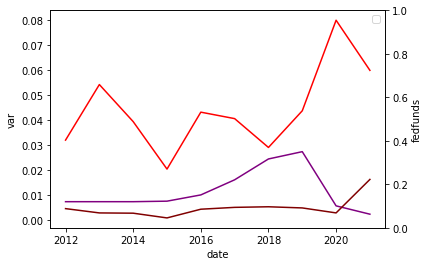

In [43]:
from statistics import variance
var_check = []
for year in range(2012,2022):
    mean = spy[spy["year"]==year]["adjclose"].mean()
    diff = (spy[spy["year"]==year]["adjclose"] - mean) / mean
    diff_squared = [abs(x) for x in diff]
    diff_total = sum(diff_squared)
    var = diff_total / spy[spy["year"]==year]["adjclose"].index.size
    var_check.append({"year":year,"var":var})
var_graph = pd.DataFrame(var_check) \
.merge(fed_fund.groupby("year").mean().reset_index().drop("quarter",axis=1),on=["year"]) \
.merge(discount_quarterly.groupby("year").mean().reset_index().drop("quarter",axis=1),on=["year"]) \
.merge(cpi_quarterly.groupby("year").mean().reset_index().drop("quarter",axis=1),on=["year"])
var_graph["fedfunds"] = var_graph["fedfunds"]/100
var_graph["discount_rate"] = var_graph["discount_rate"]/100
var_graph["rate_diff"] = var_graph["discount_rate"] - var_graph["fedfunds"]
metric = "prog"
fig,ax = plt.subplots()
ax.plot(var_graph["year"],var_graph["var"],color="red")
ax.set_xlabel("date")
ax.set_ylabel("var")
ax2 = ax.twinx()
# ax.plot(var_graph["year"],var_graph["fedfunds"],color="blue")
ax.plot(var_graph["year"],var_graph["discount_rate"],color="purple")
ax.plot(var_graph["year"],var_graph["inflation"],color="maroon")
# ax2.set_xlabel("date")
ax2.set_ylabel("fedfunds")
plt.legend(["spy","se","cpi"])
plt.show()

In [21]:
var_graph

,year,var,fedfunds,week_x,discount_rate,week_y,cpi,week,inflation,rate_diff
0,2012,0.032116,0.001400,28.583333,0.007500,28.583333,229.586083,28.583333,0.004727,0.006100
1,2013,0.054330,0.001075,24.5,0.007500,24.5,232.951750,24.5,0.003008,0.006425
2,2014,0.039515,0.000892,24.666667,0.007500,24.666667,236.715000,24.666667,0.002903,0.006608
3,2015,0.020536,0.001325,24.75,0.007708,24.75,237.001750,24.75,0.001012,0.006383
4,2016,0.043295,0.003950,28.5,0.010208,28.5,240.005417,28.5,0.004492,0.006258
5,2017,0.040714,0.010017,28.5,0.016250,28.5,245.121000,28.5,0.005232,0.006233
6,2018,0.029185,0.018317,24.333333,0.024583,24.333333,251.098917,24.333333,0.005469,0.006267
7,2019,0.043849,0.021583,24.5,0.027500,24.5,255.646500,24.5,0.005006,0.005917
8,2020,0.080046,0.003758,24.75,0.005833,24.75,258.838250,24.75,0.003014,0.002075
9,2021,0.060009,0.000800,28.416667,0.002500,22.555556,270.965417,28.416667,0.016403,0.001700


In [199]:
financials["liabilities"] = financials["liabilitiesandstockholdersequity"] - financials["stockholdersequity"]
financials_quarterly = financials.groupby(["year","quarter"]).sum().reset_index()

In [200]:
graphics = financials_quarterly.drop("adjclose",axis=1).merge(cpi_quarterly,on=["year","quarter"],how="left") \
                            .merge(fed_fund_quarterly,on=["year","quarter"],how="left") \
                            .merge(discount_quarterly,on=["year","quarter"],how="left") \
                            .merge(spy_quarterly,on=["year","quarter"],how="left").copy()
graphics["date"] = [datetime(int(row[1]["year"]),int((row[1]["quarter"] - 1) * 3 + 1),1) for row in graphics.iterrows()]
graphics = graphics[(graphics["date"]>datetime(2013,1,1))].copy()
graphics.sort_values("date",inplace=True)
cpi_prog = [0]
for i in range(1,graphics.index.size):
    prev = cpi_prog[i-1]
    cpi_prog.append((1+prev) * (1 +  graphics["inflation"].iloc[i]) -1) 
graphics["inflation_prog"] = cpi_prog
for vals in ["assets","liabilities","stockholdersequity","spy"]:
    if vals == "spy":
        graphics[f"{vals}_adj"] = [row[1]["adjclose"] * (1-row[1]["inflation_prog"]) for row in graphics.iterrows()]
    else:
        graphics[f"{vals}_adj"] = [row[1][vals] * (1-row[1]["inflation_prog"]) for row in graphics.iterrows()]
graphics["spy_prog"] = (graphics["adjclose"] - graphics["adjclose"].iloc[0]) / graphics["adjclose"].iloc[0]
# graphics["cash_prog"] = (graphics["cashandcashequivalentsatcarryingvalue"] - graphics["cashandcashequivalentsatcarryingvalue"].iloc[0]) / graphics["cashandcashequivalentsatcarryingvalue"].iloc[0]
graphics["se_prog"] = (graphics["stockholdersequity"] - graphics["stockholdersequity"].iloc[0]) / graphics["stockholdersequity"].iloc[0]
graphics["assets_prog"] = (graphics["assets"] - graphics["assets"].iloc[0]) / graphics["assets"].iloc[0]
graphics["liabilities_prog"] = (graphics["liabilities"] - graphics["liabilities"].iloc[0]) / graphics["liabilities"].iloc[0]
graphics["spy_delt"] = graphics["spy_prog"].pct_change()
graphics["se_delt"] = graphics["se_prog"].pct_change()
graphics["assets_delt"] = graphics["assets_prog"].pct_change()
# graphics["cash_delt"] = graphics["cash_prog"].pct_change()
graphics["liabilities_delt"] = graphics["liabilities_prog"].pct_change()
# graphics["cash_prog_adj"] = (graphics["cashandcashequivalentsatcarryingvalue_adj"] - graphics["cashandcashequivalentsatcarryingvalue_adj"].iloc[0]) / graphics["cashandcashequivalentsatcarryingvalue_adj"].iloc[0]
graphics["spy_prog_adj"] = (graphics["spy_adj"] - graphics["spy_adj"].iloc[0]) / graphics["spy_adj"].iloc[0]
graphics["se_prog_adj"] = (graphics["stockholdersequity_adj"] - graphics["stockholdersequity_adj"].iloc[0]) / graphics["stockholdersequity_adj"].iloc[0]
graphics["assets_prog_adj"] = (graphics["assets_adj"] - graphics["assets_adj"].iloc[0]) / graphics["assets_adj"].iloc[0]
graphics["liabilities_prog_adj"] = (graphics["liabilities_adj"] - graphics["liabilities_adj"].iloc[0]) / graphics["liabilities_adj"].iloc[0]
graphics["spy_delt_adj"] = graphics["spy_prog"].pct_change()
graphics["se_delt_adj"] = graphics["se_prog"].pct_change()
graphics["assets_delt_adj"] = graphics["assets_prog"].pct_change()
graphics["liabilities_delt_adj"] = graphics["liabilities_prog"].pct_change()
# graphics["cash_delt_adj"] = graphics["cash_prog"].pct_change()
graphics["cpi_delt"] = graphics["inflation_prog"].pct_change()

C:\Users\eric\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'week_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


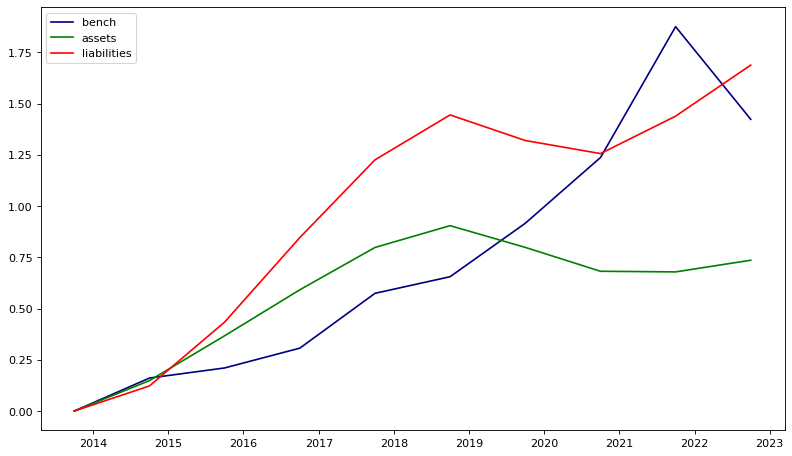

In [205]:
metric = "prog"
plt.figure(figsize=(12, 7), dpi=80)
# plt.plot(graphics["date"],graphics[f"spy_{metric}"],color="blue")
plt.plot(graphics["date"],graphics[f"spy_{metric}_adj"],color="navy")
# plt.plot(graphics["date"],graphics[f"assets_{metric}"],color="maroon")
plt.plot(graphics["date"],graphics[f"assets_{metric}_adj"],color="green")
# plt.plot(graphics["date"],graphics[f"liabilities_{metric}"],color="maroon")
plt.plot(graphics["date"],graphics[f"liabilities_{metric}_adj"],color="red")
# plt.plot(graphics["date"],graphics[f"assets_{metric}"],color="navy")
plt.legend(["bench","assets","liabilities"])
plt.show()